In [1]:
### assignment-6  team member:Yuchuan Lin (001302756), Zixiao Wang

In [ ]:
import numpy as np
import pandas as pd
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pymc3 as pm, theano.tensor as tt
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

In [2]:
df_all = pd.read_csv('Fixture.csv')

In [3]:
df_all

,Russia,Saudi Arabia,0.0
0,Egypt,Uruguay,3.2
1,Morocco,Iran,0.0
2,Portugal,Spain,0.2
3,France,Australia,5.4
4,Argentina,Iceland,1.7
5,Peru,Denmark,4.1
6,Croatia,Nigeria,0.0
7,Costa Rica,Serbia,2.1
8,Germany,Mexico,0.0
9,Brazil,Switzerland,0.1


In [4]:
teams = df_all['Russia'].unique()
teams = pd.DataFrame(teams, columns=['teams'])
teams['i'] = teams.index
teams.head()

,teams,i
0,Egypt,0
1,Morocco,1
2,Portugal,2
3,France,3
4,Argentina,4


In [5]:
df_need = pd.DataFrame()
df_need['team1'] = df_all['Russia']
df_need['team2'] = df_all['Saudi Arabia']
df_need['Result']=df_all['0.0']
df_need.head()

,team1,team2,Result
0,Egypt,Uruguay,3.2
1,Morocco,Iran,0.0
2,Portugal,Spain,0.2
3,France,Australia,5.4
4,Argentina,Iceland,1.7


In [6]:
df_need = pd.merge(df_need, teams, left_on='team1', right_on='teams', how='left')
df_need = df_need.rename(columns = {'i': 'i_home'}).drop('teams', 1)
df_need = pd.merge(df_need, teams, left_on='team2', right_on='teams', how='left')
df_need = df_need.rename(columns = {'i': 'i_away'}).drop('teams', 1)
df_need

,team1,team2,Result,i_home,i_away
0,Egypt,Uruguay,3.2,0,16
1,Morocco,Iran,0.0,1,17
2,Portugal,Spain,0.2,2,25
3,France,Australia,5.4,3,26
4,Argentina,Iceland,1.7,4,27
5,Peru,Denmark,4.1,5,18
6,Croatia,Nigeria,0.0,6,19
7,Costa Rica,Serbia,2.1,7,20
8,Germany,Mexico,0.0,8,28
9,Brazil,Switzerland,0.1,9,29


In [15]:
df_need['home_goal']=df_need['Result']//1
df_need.head()

,team1,team2,Result,i_home,i_away,home_goal
0,Egypt,Uruguay,3.2,0,16,3.0
1,Morocco,Iran,0.0,1,17,0.0
2,Portugal,Spain,0.2,2,25,0.0
3,France,Australia,5.4,3,26,5.0
4,Argentina,Iceland,1.7,4,27,1.0


In [19]:
df_need['away_goal']=df_need['Result']%1*10//1
df_need.head(100)

,team1,team2,Result,i_home,i_away,home_goal,away_goal
0,Egypt,Uruguay,3.2,0,16,3.0,2.0
1,Morocco,Iran,0.0,1,17,0.0,0.0
2,Portugal,Spain,0.2,2,25,0.0,2.0
3,France,Australia,5.4,3,26,5.0,4.0
4,Argentina,Iceland,1.7,4,27,1.0,7.0
5,Peru,Denmark,4.1,5,18,4.0,0.0
6,Croatia,Nigeria,0.0,6,19,0.0,0.0
7,Costa Rica,Serbia,2.1,7,20,2.0,1.0
8,Germany,Mexico,0.0,8,28,0.0,0.0
9,Brazil,Switzerland,0.1,9,29,0.0,1.0


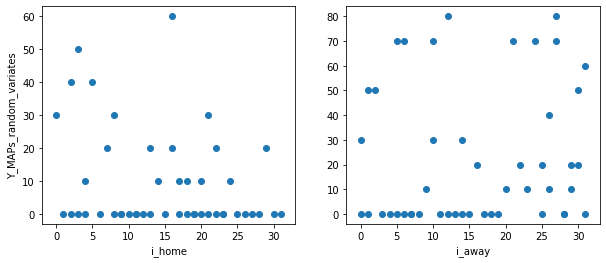

In [21]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(df_need['i_home'], 10*df_need['home_goal'])
axes[1].scatter(df_need['i_away'], 10*df_need['away_goal'])
axes[0].set_ylabel('Y_MAPs_random_variates'); axes[0].set_xlabel('i_home'); axes[1].set_xlabel('i_away');

In [30]:
num_teams = len(teams)
home_team = df_need['i_home'].values
away_team = df_need['i_away'].values
observed_home_goals = df_need['home_goal']
observed_away_goals = df_need['away_goal']

In [31]:
with pm.Model() as model:
    # global model priors: standard deviation and intercept.
    # We are saying that the standard deviation and intercept priors of each
    # team's att and def parameters stem from the same folded-t distribution.
    # You need to match these to the real priors above - I did not do this because
    # i'm lazy. I just picked a nu and sd out of my hat :-)
    # Note use of student-t because we only have 32 teams, low number.
    home = pm.Flat('home') #flat pdf is uninformative - means we have no idea
    sd_att = pm.HalfStudentT('sd_att', nu=3, sd=2.5)
    sd_def = pm.HalfStudentT('sd_def', nu=3, sd=2.5)
    intercept = pm.Flat('intercept') #no idea

    # team-specific model parameters. There is one (atts_star, defs_star) tuple per team.
    # Note use of normal distribution because we assume we have a lot of data per team
    # (not really here, but *you* should!)
    atts_star = pm.Normal("atts_star", mu=0, sd=sd_att, shape=num_teams)
    defs_star = pm.Normal("defs_star", mu=0, sd=sd_def, shape=num_teams)

    # To allow samples of expressions to be saved, we need to wrap them in pymc3 Deterministic objects
    # We save these parameters for later exploration.
    atts = pm.Deterministic('atts', atts_star - tt.mean(atts_star))
    defs = pm.Deterministic('defs', defs_star - tt.mean(defs_star))
    
    # Assume exponential search on home_theta and away_theta. With pymc3, need to rely on theano.
    # tt is theano.tensor.. why Sampyl may be easier to use..
    home_theta = tt.exp(intercept + home + atts[home_team] + defs[away_team])  
    away_theta = tt.exp(intercept + atts[away_team] + defs[home_team])

    # likelihood of observed data, Poisson distribution for coutn data, always!
    home_points = pm.Poisson('home_points', mu=home_theta, observed=observed_home_goals)
    away_points = pm.Poisson('away_points', mu=away_theta, observed=observed_away_goals)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [defs_star, atts_star, intercept, sd_def, sd_att, home]
Sampling 2 chains: 100%|██████████| 4000/4000 [00:06<00:00, 627.61draws/s]
/Users/riverlin/anaconda3/lib/python3.7/site-packages/arviz/plots/traceplot.py:155: SyntaxWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (132), generating only 40 plots
  SyntaxWarning,


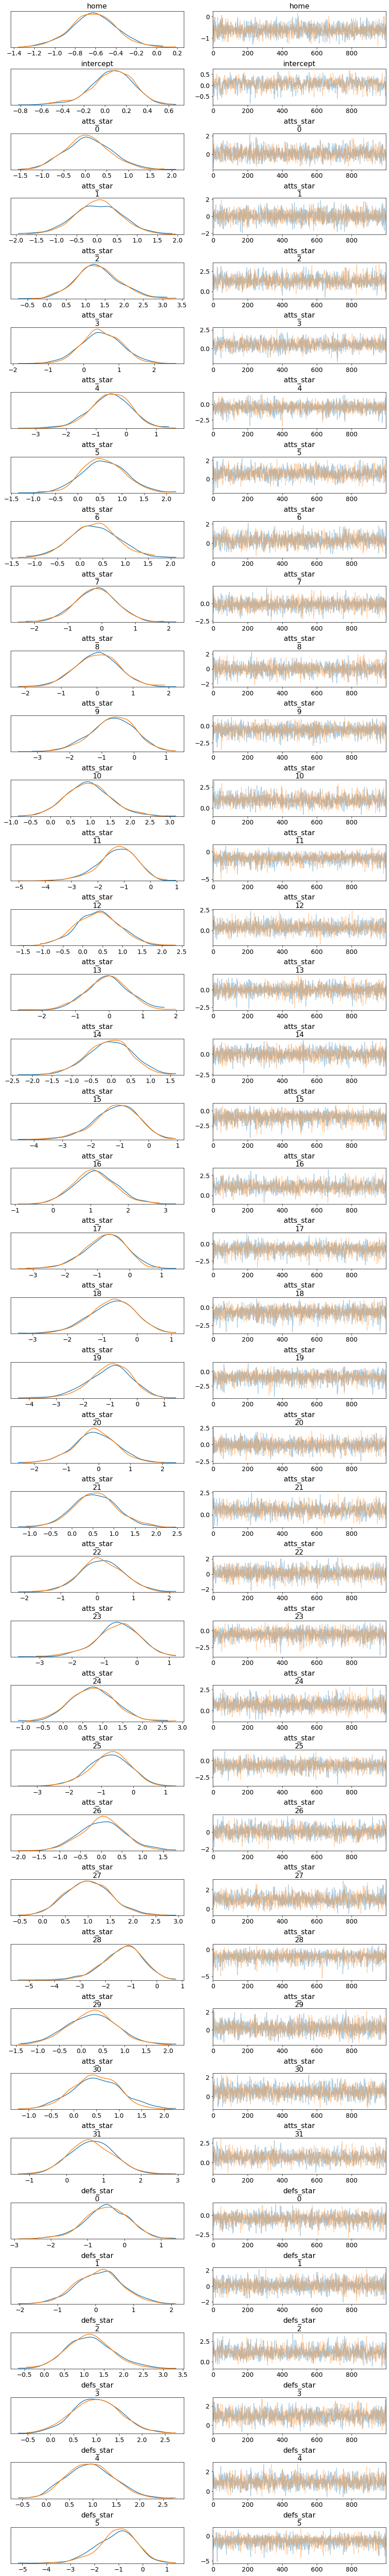

In [32]:
with model:
    trace = pm.sample(1000, tune=1000, cores=2)
    pm.traceplot(trace)

In [33]:
pm.stats.hpd(trace['atts'])

array([[-0.93395977,  1.02133937],
       [-1.03320232,  1.0551216 ],
       [ 0.23576065,  2.38215844],
       [-0.53116517,  1.51240626],
       [-1.86456637,  0.66678735],
       [-0.30172087,  1.47049042],
       [-0.65794578,  1.26749316],
       [-1.33638168,  1.06683307],
       [-1.22388661,  1.083121  ],
       [-1.90419772,  0.67987675],
       [-0.05529631,  2.0107089 ],
       [-2.74016693,  0.01601437],
       [-0.59200091,  1.43352062],
       [-1.21146681,  1.15433863],
       [-1.16050698,  0.91403393],
       [-2.68159568,  0.20669564],
       [ 0.07817368,  2.18635112],
       [-2.13112508,  0.36166439],
       [-2.01378993,  0.49095236],
       [-2.62388632,  0.33946626],
       [-1.39163198,  1.15249997],
       [-0.41211107,  1.53992784],
       [-0.98325133,  1.27354763],
       [-1.92184503,  0.69725185],
       [-0.24537309,  1.85901464],
       [-2.04649293,  0.32910691],
       [-0.93723771,  1.08817872],
       [ 0.09614919,  1.93856156],
       [-2.83476494,

In [34]:
pm.stats.quantiles(trace['atts'])

{2.5: array([-0.89703942, -1.03195373,  0.30235455, -0.53769094, -1.88351393,
        -0.2790264 , -0.6565987 , -1.42720278, -1.17243113, -2.02921748,
        -0.03660896, -2.89719547, -0.64642133, -1.27946084, -1.12030027,
        -2.83078021,  0.09743037, -2.12849778, -2.07947286, -2.70905836,
        -1.43258726, -0.43687554, -1.00897973, -2.05337293, -0.28974532,
        -2.03362669, -0.98543395,  0.11001079, -3.04493695, -0.79310491,
        -0.51220751, -0.39787646]),
 25: array([-0.26407633, -0.32516958,  0.95784158,  0.14937548, -0.94350222,
         0.27594564, -0.02533242, -0.55555973, -0.39747791, -1.07737777,
         0.5928343 , -1.69841373,  0.04204158, -0.44069145, -0.40580976,
        -1.56206399,  0.7490282 , -1.16771029, -1.10483349, -1.48267505,
        -0.50529484,  0.23199953, -0.24644043, -0.98653254,  0.3962495 ,
        -1.12522815, -0.28336966,  0.68358373, -1.80755872, -0.11076635,
         0.15534997,  0.28810085]),
 50: array([ 0.05444125,  0.03955448,  1.28

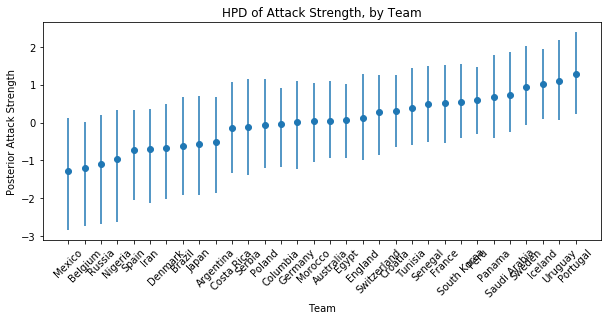

In [36]:
df_hpd = pd.DataFrame(pm.stats.hpd(trace['atts']),
                      columns=['hpd_low', 'hpd_high'],
                      index=teams.teams.values)
df_median = pd.DataFrame(pm.stats.quantiles(trace['atts'])[50],
                         columns=['hpd_median'],
                         index=teams.teams.values)
df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(10,4))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('HPD of Attack Strength, by Team')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior Attack Strength')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=45)

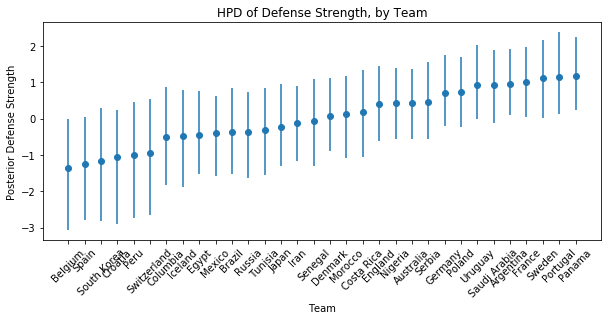

In [37]:
df_hpd = pd.DataFrame(pm.stats.hpd(trace['defs']),
                      columns=['hpd_low', 'hpd_high'],
                      index=teams.teams.values)
df_median = pd.DataFrame(pm.stats.quantiles(trace['defs'])[50],
                         columns=['hpd_median'],
                         index=teams.teams.values)
df_hpd = df_hpd.join(df_median)
df_hpd['relative_lower'] = df_hpd.hpd_median - df_hpd.hpd_low
df_hpd['relative_upper'] = df_hpd.hpd_high - df_hpd.hpd_median
df_hpd = df_hpd.sort_values(by='hpd_median')
df_hpd = df_hpd.reset_index()
df_hpd['x'] = df_hpd.index + .5


fig, axs = plt.subplots(figsize=(10,4))
axs.errorbar(df_hpd.x, df_hpd.hpd_median,
             yerr=(df_hpd[['relative_lower', 'relative_upper']].values).T,
             fmt='o')
axs.set_title('HPD of Defense Strength, by Team')
axs.set_xlabel('Team')
axs.set_ylabel('Posterior Defense Strength')
_= axs.set_xticks(df_hpd.index + .5)
_= axs.set_xticklabels(df_hpd['index'].values, rotation=45)

### almost close to conclution
according to the plot, finall we know the best team is the one with highest attack rate and lowest dedence rate.

In [38]:
with model:
    pp_trace = pm.sample_ppc(trace)

/Users/riverlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  
100%|██████████| 2000/2000 [00:02<00:00, 914.95it/s]


In [42]:
home_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * home_won
        for i, home_won in enumerate(pp_trace['home_points'] > pp_trace['away_points'])
})
home_sim_df.insert(0, 'team', df_need['team1'])

away_sim_df = pd.DataFrame({
    'sim_points_{}'.format(i): 3 * away_won
        for i, away_won in enumerate(pp_trace['home_points'] < pp_trace['away_points'])
})
away_sim_df.insert(0, 'team', df_need['team2'])

In [43]:
sim_table = (home_sim_df.groupby('team')
                        .sum()
                        .add(away_sim_df.groupby('team')
                                        .sum())
                        .rank(ascending=False, method='min', axis=0)
                        .reset_index()
                        .melt(id_vars='team', value_name='rank')
                        .groupby('team')
                        ['rank']
                        .value_counts()
                        .unstack(level='rank')
                        .fillna(0)
                        .div(1000))

In [44]:
sim_table

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0
team,,,,,,,,,,,,,,,,,,,,,
Argentina,0.001,0.001,0.004,0.005,0.003,0.001,0.012,0.041,0.079,0.122,...,0.044,0.104,0.141,0.203,0.211,0.201,0.095,0.046,0.012,0.004
Australia,0.069,0.134,0.217,0.210,0.124,0.036,0.025,0.042,0.105,0.154,...,0.019,0.036,0.042,0.070,0.065,0.065,0.023,0.010,0.005,0.000
Belgium,0.058,0.066,0.096,0.075,0.040,0.012,0.017,0.040,0.081,0.116,...,0.039,0.093,0.121,0.185,0.182,0.133,0.054,0.032,0.012,0.001
Brazil,0.041,0.049,0.072,0.074,0.036,0.016,0.011,0.048,0.098,0.140,...,0.037,0.076,0.119,0.164,0.167,0.134,0.070,0.028,0.011,0.002
Columbia,0.270,0.163,0.223,0.190,0.107,0.024,0.016,0.040,0.102,0.131,...,0.016,0.026,0.040,0.050,0.044,0.041,0.017,0.010,0.001,0.001
Costa Rica,0.064,0.069,0.103,0.091,0.039,0.019,0.015,0.034,0.088,0.130,...,0.029,0.081,0.095,0.179,0.163,0.135,0.049,0.038,0.010,0.001
Croatia,0.571,0.204,0.288,0.256,0.119,0.042,0.013,0.034,0.069,0.086,...,0.002,0.003,0.007,0.011,0.008,0.004,0.004,0.001,0.000,0.000
Denmark,0.030,0.033,0.041,0.033,0.020,0.007,0.010,0.024,0.059,0.095,...,0.052,0.101,0.161,0.247,0.266,0.229,0.117,0.055,0.020,0.006
Egypt,0.308,0.148,0.247,0.199,0.117,0.036,0.019,0.043,0.094,0.137,...,0.008,0.023,0.023,0.051,0.039,0.035,0.011,0.002,0.000,0.001


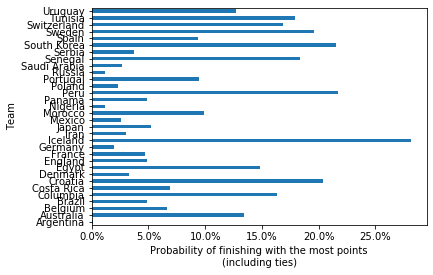

In [51]:
ax = sim_table.loc[:, 2].plot(kind='barh')

ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1%}'));
ax.set_xlabel("Probability of finishing with the most points\n(including ties)");

ax.set_ylabel("Team");

### iceland may win!